<a href="https://colab.research.google.com/github/palash-21/Netflix-Movies-And-TV-Shows-EDA-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#1 Data Loading and Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
netflix_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Netflix Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
print('Number of entries and features :',netflix_df.shape)
netflix_df.head()

Number of entries and features : (7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
# Checking for duplicates
netflix_df.duplicated(subset=['title']).value_counts()

False    7787
dtype: int64

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


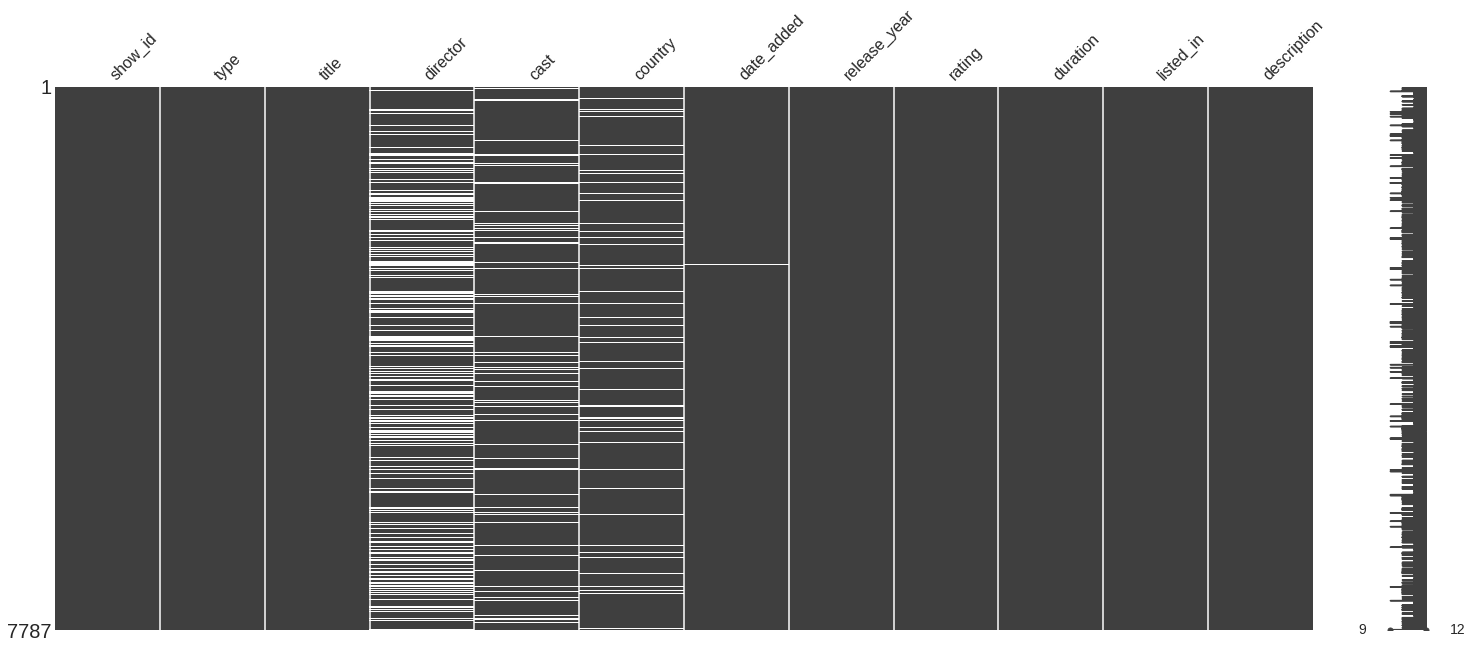

In [ ]:
msno.matrix(netflix_df)

In [ ]:
#We can see from the info output and missing na mattrix that we have 5 columns with missing values
#Lets check these values as percentages.

netflix_df.isnull().sum()/len(netflix_df.index)*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


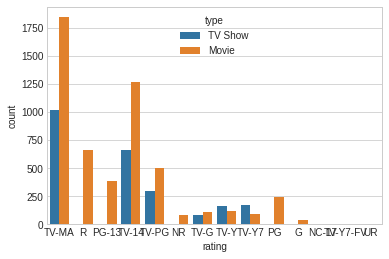

In [ ]:
# Rating
sns.countplot(netflix_df['rating'],hue=netflix_df['type'])

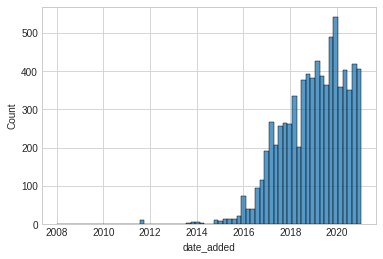

In [ ]:
# Date added
# Converting the string into datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
sns.histplot(netflix_df['date_added'])

In [ ]:
# As rating and date_added features have very low perc of null values, we will replace nulls with the majority/mode
# Majority of ratings are TV-MA for both Movies and TV Shows
# Mode for  date added is 1st Jan 2020
netflix_df.loc[netflix_df['rating'].isna(),'rating']= netflix_df['rating'].mode()[0]
netflix_df.loc[netflix_df['date_added'].isna(),'date_added']= netflix_df['date_added'].mode()[0]

In [ ]:
# Country, Cast and Director have high nulls values 
# We will replace nulls with empty string for further use 
# Before doing that we will store the non-null entries for EDA
cast_no_na_df=netflix_df[~netflix_df['cast'].isna()]
country_no_na_df=netflix_df[~netflix_df['country'].isna()]
director_no_na_df=netflix_df[~netflix_df['director'].isna()]
netflix_df.loc[netflix_df['cast'].isna(),'cast'] = ''
netflix_df.loc[netflix_df['country'].isna(),'country'] = ''
netflix_df.loc[netflix_df['director'].isna(),'director'] = ''

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7787 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7787 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


# EDA

In [ ]:
netflix_df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,7787,7787,7787,7787,7787.000000,7787,7787,7787,7787
unique,7787,2,7787,4050,6832,682,1512,NaN,14,216,492,7769
top,s1,Movie,3%,,,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2389,718,2555,129,NaN,2870,1608,334,3
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-16 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN


In [ ]:
# Cheking the unique values for diff features
for col in ['type','rating','release_year']:
  print(col,netflix_df[col].unique(),'\n')

type ['TV Show' 'Movie'] 

rating ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR'] 

release_year [2020 2016 2011 2009 2008 2019 1997 2017 2018 2014 2015 2010 2005 2013
 2012 2006 2000 2003 1989 2004 1977 1971 1993 2007 1998 1988 1996 2002
 1986 1990 1979 1980 1974 2001 1999 1966 1991 1982 1994 1995 1978 1992
 1972 1975 2021 1973 1967 1960 1981 1958 1976 1968 1956 1985 1965 1984
 1983 1987 1945 1946 1962 1925 1942 1969 1955 1963 1964 1954 1970 1944
 1947 1959 1943] 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


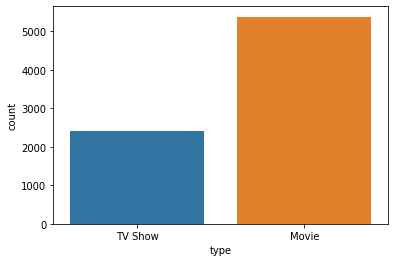

In [ ]:
# Movies vs TV Shows
sns.countplot(netflix_df['type'])

So, majority of entries are movies. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


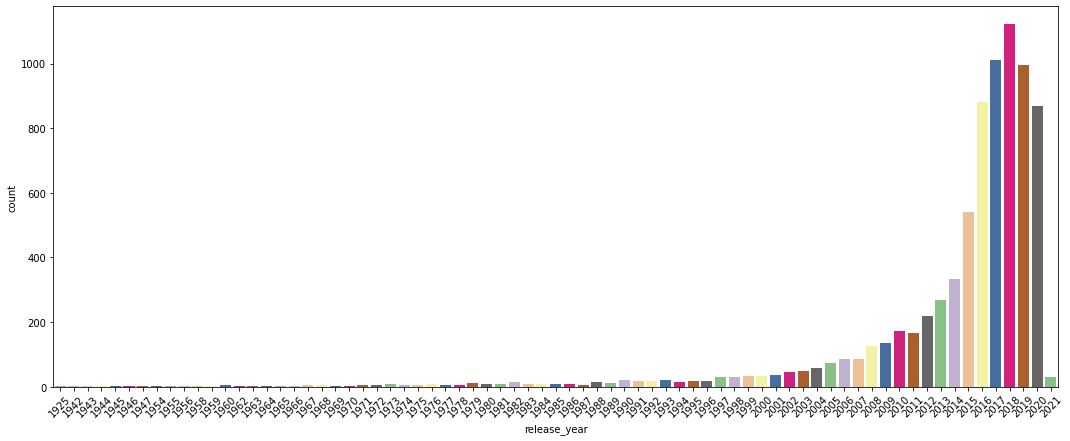

In [ ]:
plt.figure(figsize = (18, 7))
plt.xticks(rotation = 45)
sns.countplot(netflix_df['release_year'],palette = "Accent")

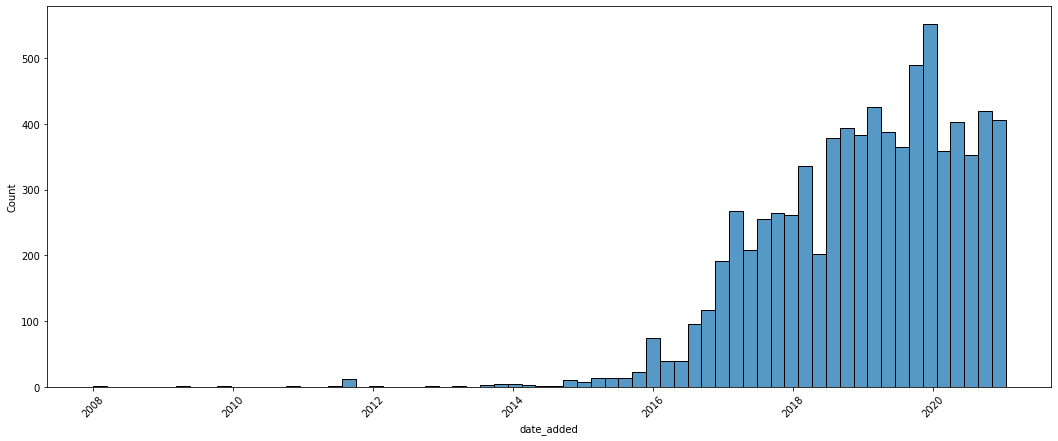

In [ ]:
plt.figure(figsize = (18, 7))
plt.xticks(rotation = 45)
sns.histplot(netflix_df['date_added'])

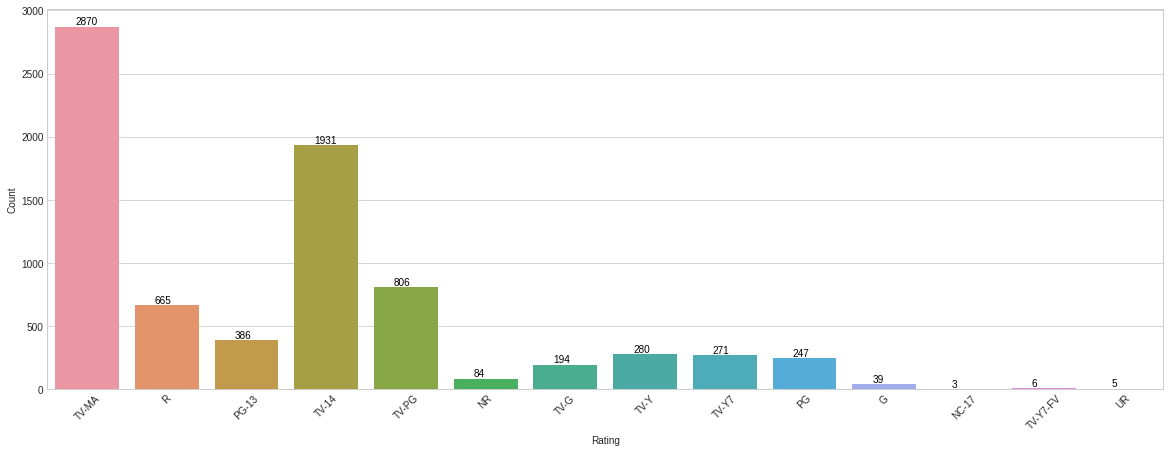

In [ ]:
plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'rating', data = netflix_df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [ ]:
# Working with genre (listed-in) column
netflix_df['listed_in'].nunique()

492

In [ ]:
netflix_df['listed_in'][0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [ ]:
# Converting the values from str to list of genres
genre_list = []
for genres in netflix_df['listed_in']:
  row_list = str(genres).strip().split(', ')
  genre_list.append(row_list)
netflix_df['genres_list']=genre_list
netflix_df.drop(columns=['listed_in'],inplace=True)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genres_list
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...,"[Dramas, International Movies]"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"When an army recruit is found dead, his fellow...","[Horror Movies, International Movies]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi...","[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,A brilliant group of students become card-coun...,[Dramas]


In [ ]:
# Making a set of unique genres from the column 'listed-in'
#Create empty genres lists for TV shows and movies 
movie_genres = []
tvshow_genres = []

#loop through genres and type column
for index,row in netflix_df.iterrows():
  # Only for movies
  if row['type']=='Movie':
    #loop through each row's list of genres and populate the genres list created in the cell's first line
    for genre in row['genres_list']:
        if genre not in movie_genres:
            movie_genres.append(genre)

    # Repeating same for TV show
  else:
    #loop through each row's list of genres and populate the genres list created in the cell's first line
    for genre in row['genres_list']:
      if genre not in tvshow_genres:
        tvshow_genres.append(genre)            
   
print('For Movies :',len(movie_genres),movie_genres)
print('For TV Shows :',len(tvshow_genres),tvshow_genres)

For Movies : 20 ['Dramas', 'International Movies', 'Horror Movies', 'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy', 'Thrillers', 'Documentaries', 'Sports Movies', 'Comedies', 'Romantic Movies', 'Movies', 'Music & Musicals', 'LGBTQ Movies', 'Faith & Spirituality', 'Children & Family Movies', 'Classic Movies', 'Cult Movies', 'Stand-Up Comedy', 'Anime Features']
For TV Shows : 22 ['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy', 'TV Mysteries', 'Crime TV Shows', 'Docuseries', 'Anime Series', 'Reality TV', 'TV Comedies', 'Romantic TV Shows', 'Science & Nature TV', 'British TV Shows', 'Korean TV Shows', "Kids' TV", 'TV Action & Adventure', 'Spanish-Language TV Shows', 'TV Shows', 'TV Horror', 'Stand-Up Comedy & Talk Shows', 'Teen TV Shows', 'TV Thrillers', 'Classic & Cult TV']


In [ ]:
# So we have 22/20 unique genres for TV show/movies resp.
# Lets check the popularity of genres
# Creating frequency dictionary 
genre_freqs_movie = {}
genre_freqs_tvshow = {}

#import operator module for sorting dictionary items by value counts
import operator

#loop through genres list for movies and then for show
for genre in movie_genres:
  genre_freqs_movie[genre] = 0
  #update frequency dictionary with frequencies for each genre
  for index,row in netflix_df.iterrows():
    if row['type']=='Movie':
      if genre in row['genres_list']:
        genre_freqs_movie[genre] += 1
for genre in tvshow_genres:
  genre_freqs_tvshow[genre] = 0
  #update frequency dictionary with frequencies for each genre
  for index,row in netflix_df.iterrows():
    if row['type']=='TV Show':
      if genre in row['genres_list']:
        genre_freqs_tvshow[genre] += 1

#sort frequency dictionary by values
sorted_genres_movie = dict(sorted(genre_freqs_movie.items(), key=operator.itemgetter(1), reverse=True))
sorted_genres_tvshow = dict(sorted(genre_freqs_tvshow.items(), key=operator.itemgetter(1), reverse=True))
print(sorted_genres_movie)
print(sorted_genres_tvshow)

{'International Movies': 2437, 'Dramas': 2106, 'Comedies': 1471, 'Documentaries': 786, 'Action & Adventure': 721, 'Independent Movies': 673, 'Children & Family Movies': 532, 'Romantic Movies': 531, 'Thrillers': 491, 'Stand-Up Comedy': 329, 'Music & Musicals': 321, 'Horror Movies': 312, 'Sci-Fi & Fantasy': 218, 'Sports Movies': 196, 'Classic Movies': 103, 'LGBTQ Movies': 90, 'Cult Movies': 59, 'Faith & Spirituality': 57, 'Anime Features': 57, 'Movies': 56}
{'International TV Shows': 1199, 'TV Dramas': 704, 'TV Comedies': 525, 'Crime TV Shows': 427, "Kids' TV": 414, 'Docuseries': 353, 'Romantic TV Shows': 333, 'British TV Shows': 232, 'Reality TV': 222, 'Korean TV Shows': 150, 'TV Action & Adventure': 150, 'Anime Series': 148, 'Spanish-Language TV Shows': 147, 'TV Mysteries': 90, 'Science & Nature TV': 85, 'TV Sci-Fi & Fantasy': 76, 'TV Horror': 69, 'Teen TV Shows': 60, 'Stand-Up Comedy & Talk Shows': 52, 'TV Thrillers': 50, 'Classic & Cult TV': 27, 'TV Shows': 12}


findfont: Font family ['Silom'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Silom'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Silom'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Silom'] not found. Falling back to DejaVu Sans.


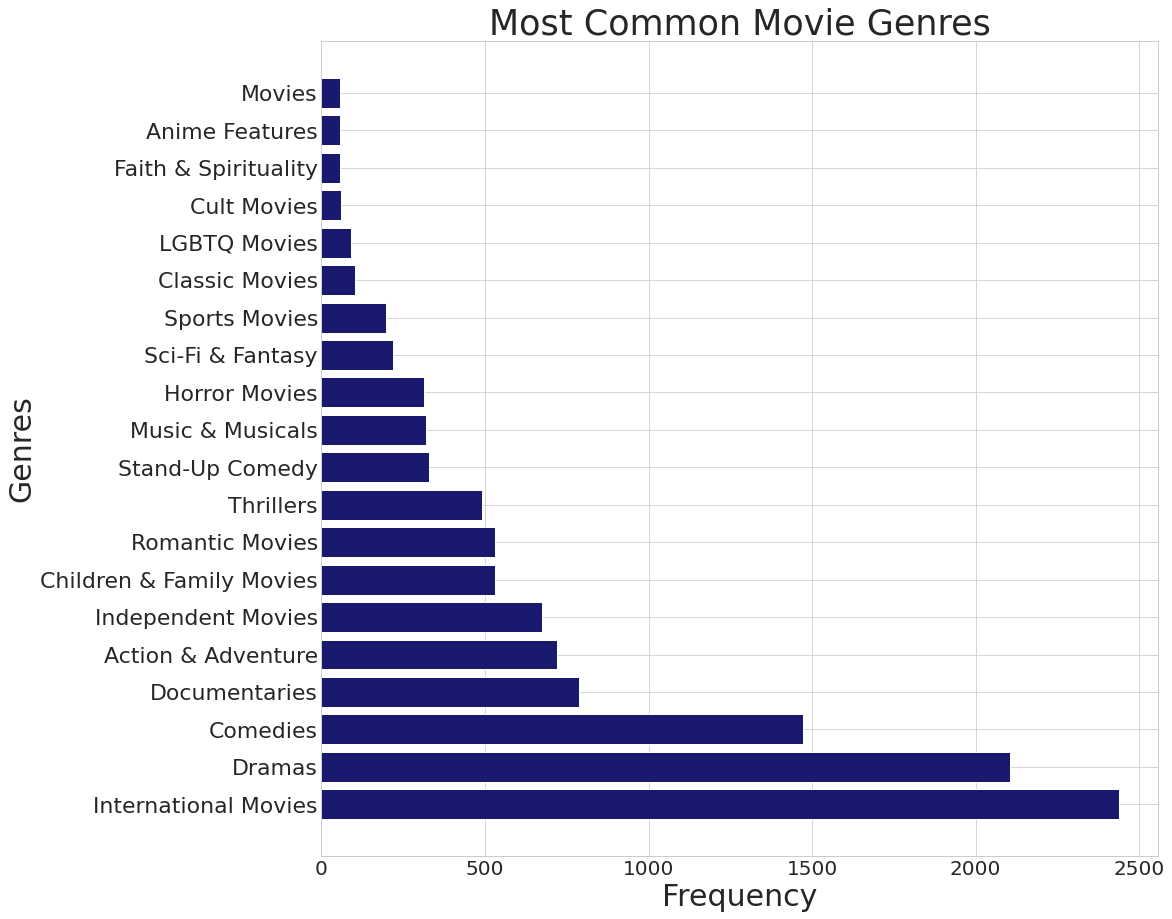

In [ ]:
#Time to plot these frequencies! 
#The first step is to assign the frequencies to the values.

# For movies
x = list(sorted_genres_movie.keys())
y = list(sorted_genres_movie.values())
plt.figure(figsize = (15,15))
#make a bar plot on the figure
plt.barh(x, y, color = 'midnightblue', edgecolor='1')

#label the axes, title, and ticks
plt.xlabel('Frequency', fontsize=30, fontname='Silom')
plt.ylabel('Genres', fontsize=30, fontname='Silom')
plt.xticks(fontsize=20, fontname='Silom')
plt.yticks(fontsize=22, fontname='Silom')
plt.title('Most Common Movie Genres', fontsize=35, fontname='Silom')

#display the plot
plt.show()

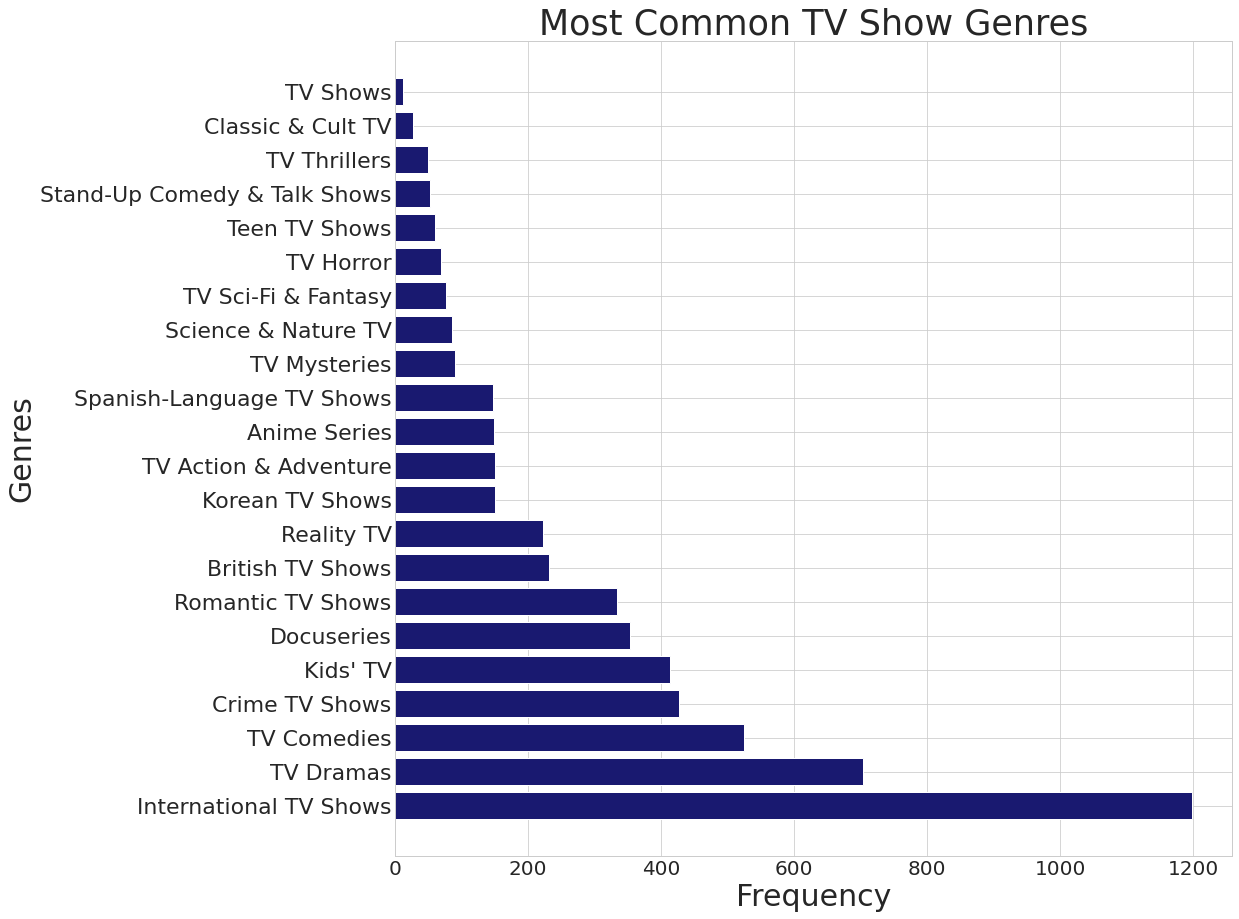

In [ ]:
# For TV shows
x = list(sorted_genres_tvshow.keys())
y = list(sorted_genres_tvshow.values())
plt.figure(figsize = (15,15))
#make a bar plot on the figure
plt.barh(x, y, color = 'midnightblue', edgecolor='1')

#label the axes, title, and ticks
plt.xlabel('Frequency', fontsize=30, fontname='Silom')
plt.ylabel('Genres', fontsize=30, fontname='Silom')
plt.xticks(fontsize=20, fontname='Silom')
plt.yticks(fontsize=22, fontname='Silom')
plt.title('Most Common TV Show Genres', fontsize=35, fontname='Silom')

#display the plot
plt.show()

In [ ]:
#working with cast column
netflix_df['cast'][0]

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

In [ ]:
top actors
top directors
duration distribution for all, for top 100 movies acc to imdb
top countries with shows/movies
tv/show for most missing values like director,etc

In [ ]:
word cloud for
title
actor
director
genre
description

In [ ]:
bivariate
top ratings for diff genres,countries
top genres for diff countries
word cloud 
title,genre,description for diff countries
title for diff ratings
top genres for imdb user ratings

In [ ]:
world map visualization
count of tv/movie,

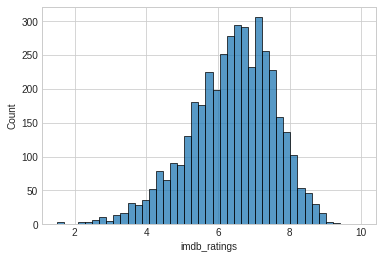

In [ ]:
# Lets check the imdb user ratings
sns.histplot(df['imdb_ratings'])